In [26]:
import numpy as np
from scipy.linalg import logm
import matplotlib.pyplot as plt

In [27]:
# a separate version of entanglent entropy function

def ent_entropy(n, rho, nA, indicesA, reg):
    """
    calculate the entanglement entropy
    input:
       rho: density matrix
       n: number of qubits
       nA: number of qubits in partition A
        indicesA: einsum string for partial trace
        reg: infinitesimal regularization
    """
    tensorrho = rho.reshape(
        tuple([2 for i in range(2 * n)])
    )
    rhoA = np.einsum(indicesA, tensorrho)
    matrhoA = rhoA.reshape(2 ** nA, 2 ** nA) + reg * np.identity(2 ** nA)
    s = -np.trace(matrhoA @ logm(matrhoA)) / np.log(2)
    return s

In [28]:


print("###############################################################")
print("test entanglement entropy for random pure tensor product states")
print("###############################################################")


def random_single_qubit_state():
    qb0=np.random.rand(2)-0.5 + (0.0+1.0j)*(np.random.rand(2)-0.5)
    qb0=qb0/np.sqrt(np.dot(np.conj(qb0),qb0))

    print(qb0)
    print(np.dot(np.conj(qb0),qb0))
    return qb0


def random_tensor_product_state(n):
    psi=np.asarray([1])
    for i in range(n):
        qb=random_single_qubit_state()
        psi=np.kron(qb,psi)
    return psi

    
        
n=2
reg=1.0e-10



state=random_tensor_product_state(n)

rho=np.kron(state,np.conj(state))

nA=1
indicesA='abac'

s=ent_entropy(n, rho, nA, indicesA, reg)

print("-------------------------------")
print("test 2 qubits partition 1")
print("entropy should be zero")
print("-------------------------------")
print("entropy real part=",s.real)
print("entropy imaginary part=",s.imag)
print("-------------------------------")

indicesA='abcb'

s=ent_entropy(n, rho, nA, indicesA, reg)


print("-------------------------------")
print("test 2 qubits partition 2")
print("entropy should be zero")
print("-------------------------------")
print("entropy real part=",s.real)
print("entropy imaginary part=",s.imag)
print("-------------------------------")


n=3


state=random_tensor_product_state(n)

rho=np.kron(state,np.conj(state))


nA=2
indicesA='abcade'

s=ent_entropy(n, rho, nA, indicesA, reg)


print("-------------------------------")
print("test 3 qubits partition 1")
print("entropy should be zero")
print("-------------------------------")
print("entropy real part=",s.real)
print("entropy imaginary part=",s.imag)
print("-------------------------------")

nA=1
indicesA='abcabd'

s=ent_entropy(n, rho, nA, indicesA, reg)


print("-------------------------------")
print("test 3 qubits partition 2")
print("entropy should be zero")
print("-------------------------------")
print("entropy real part=",s.real)
print("entropy imaginary part=",s.imag)
print("-------------------------------")

nA=1
indicesA='abcadc'

s=ent_entropy(n, rho, nA, indicesA, reg)


print("-------------------------------")
print("test 3 qubits partition 3")
print("entropy should be zero")
print("-------------------------------")
print("entropy real part=",s.real)
print("entropy imaginary part=",s.imag)
print("-------------------------------")



print("###############################################################")
print("end of test entanglement entropy for random pure tensor product states")
print("###############################################################")



###############################################################
test entanglement entropy for random pure tensor product states
###############################################################
[ 0.59151909+0.20055013j -0.77973519+0.0435643j ]
(1.0000000000000002+0j)
[-0.03246425+0.5501783j  -0.5026471 +0.66602988j]
(1.0000000000000002+0j)
-------------------------------
test 2 qubits partition 1
entropy should be zero
-------------------------------
entropy real part= 3.177658461360881e-09
entropy imaginary part= 6.406853007629835e-16
-------------------------------
-------------------------------
test 2 qubits partition 2
entropy should be zero
-------------------------------
entropy real part= 3.1776581410182303e-09
entropy imaginary part= 1.281370601525967e-15
-------------------------------
[0.62258519+0.54738101j 0.0220572 -0.55881588j]
(0.9999999999999998+0j)
[ 0.75584729-0.30838981j -0.36148721-0.45046375j]
(1+0j)
[0.24014589-0.42680917j 0.47940988+0.72823763j]
(1+0j)
-----------

In [29]:
print("###############################################################")
print("test entanglement entropy for maximally entangled states")
print("###############################################################")

def BellGHZ(n):
    zerostate=np.asarray([1,0],dtype=complex)
    onestate=np.asarray([0,1],dtype=complex)
    
    print(zerostate)
    print(onestate)
    
    allzerostate=np.asarray([1])
    allonestate=np.asarray([1])
    for i in range(n):
        allzerostate=np.kron(zerostate,allzerostate)
        allonestate=np.kron(onestate,allonestate)
    psi=(1.0/np.sqrt(2.0))*(allzerostate + allonestate)
    return psi
    
n=2
nA=1

state=BellGHZ(n)
rho=np.kron(state,np.conj(state))


indicesA='abac'

s=ent_entropy(n, rho, nA, indicesA, reg)

print("-------------------------------")
print("test 2 qubits bell state partition 1")
print("entropy should be 1")
print("-------------------------------")
print("entropy real part=",s.real)
print("entropy imaginary part=",s.imag)
print("-------------------------------")

indicesA='abcb'

s=ent_entropy(n, rho, nA, indicesA, reg)


print("-------------------------------")
print("test 2 qubits bell state partition 2")
print("entropy should be 1")
print("-------------------------------")
print("entropy=",s)
print("entropy real part=",s.real)
print("entropy imaginary part=",s.imag)
print("-------------------------------")


n=3

state=BellGHZ(n)

rho=np.kron(state,np.conj(state))

nA=1                                  
indicesA='abcabd'

s=ent_entropy(n, rho, nA, indicesA, reg)

print("-------------------------------")
print("test 3 qubits GHZ state partition 1")
print("entropy should be 1")
print("-------------------------------")
print("entropy real part=",s.real)
print("entropy imaginary part=",s.imag)
print("-------------------------------")

nA=2                                  
indicesA='abcdec'

s=ent_entropy(n, rho, nA, indicesA, reg)

print("-------------------------------")
print("test 3 qubits GHZ state partition 2")
print("entropy should be 1")
print("-------------------------------")
print("entropy real part=",s.real)
print("entropy imaginary part=",s.imag)
print("-------------------------------")


                                  

print("###############################################################")
print("end of test entanglement entropy for maximally entangled states")
print("###############################################################")



###############################################################
test entanglement entropy for maximally entangled states
###############################################################
[1.+0.j 0.+0.j]
[0.+0.j 1.+0.j]
-------------------------------
test 2 qubits bell state partition 1
entropy should be 1
-------------------------------
entropy real part= 0.999999999911461
entropy imaginary part= -0.0
-------------------------------
-------------------------------
test 2 qubits bell state partition 2
entropy should be 1
-------------------------------
entropy= (0.999999999911461-0j)
entropy real part= 0.999999999911461
entropy imaginary part= -0.0
-------------------------------
[1.+0.j 0.+0.j]
[0.+0.j 1.+0.j]
-------------------------------
test 3 qubits GHZ state partition 1
entropy should be 1
-------------------------------
entropy real part= 0.999999999911461
entropy imaginary part= -0.0
-------------------------------
-------------------------------
test 3 qubits GHZ state partiti

In [30]:
print("###############################################################")
print("test entanglement entropy for a 4 qubit entangled case")
print("###############################################################")


def binarystring_to_state(s):
    n=len(s)
    zerostate=np.asarray([1,0],dtype=complex)
    onestate=np.asarray([0,1],dtype=complex)
    psi=np.asarray([1])
    for i in range(n):
        if int(s[i]):
            psi=np.kron(onestate,psi)
        else:
            psi=np.kron(zerostate,psi)
    return psi

n=4
reg=1.0e-10
state=0.5*(binarystring_to_state('0000')+binarystring_to_state('0101')+binarystring_to_state('1010')+binarystring_to_state('1111'))
rho=np.kron(state,np.conj(state))            


nA=2

indicesA='abcdabef'

s=ent_entropy(n, rho, nA, indicesA, reg)

print("-------------------------------")
print("test 4 qubits entangled state partition (2,2)")
print("entropy should be 2")
print("-------------------------------")
print("entropy real part=",s.real)
print("entropy imaginary part=",s.imag)
print("-------------------------------")


nA=3

indicesA='abcdaefg'

s=ent_entropy(n, rho, nA, indicesA, reg)

print("-------------------------------")
print("test 4 qubits entangled state partition (1,3)")
print("entropy should be 1")
print("-------------------------------")
print("entropy real part=",s.real)
print("entropy imaginary part=",s.imag)
print("-------------------------------")

                                  

print("###############################################################")
print("end of test entanglement entropy for a 4 qubit entangled case")
print("###############################################################")


###############################################################
test entanglement entropy for a 4 qubit entangled case
###############################################################
-------------------------------
test 4 qubits entangled state partition (2,2)
entropy should be 2
-------------------------------
entropy real part= 2.0000000002229217
entropy imaginary part= -0.0
-------------------------------
-------------------------------
test 4 qubits entangled state partition (1,3)
entropy should be 1
-------------------------------
entropy real part= 1.0000000198430314
entropy imaginary part= -0.0
-------------------------------
###############################################################
end of test entanglement entropy for a 4 qubit entangled case
###############################################################


###############################################################
test entanglement entropy for 2 qubit biased coin
###############################################################


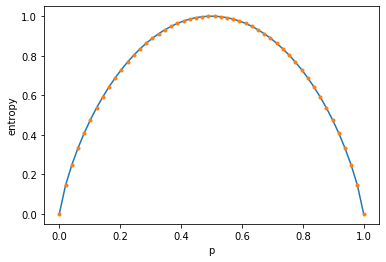

###############################################################
end test entanglement entropy for 2 qubit biased coin
###############################################################


In [35]:
print("###############################################################")
print("test entanglement entropy for 2 qubit biased coin")
print("###############################################################")


def coinstate(p):
    coinzero=binarystring_to_state('00')
    coinone=binarystring_to_state('11')
    return np.sqrt(p)*coinzero+np.sqrt(1.0-p)*coinone


import scipy.stats as st


n=2
nA=1
reg=1.0e-10
indicesA='abac'
pgrid=np.linspace(0.0,1.0)
sgrid=np.zeros(len(pgrid))
sgrid2=np.zeros(len(pgrid))

for i in range(len(pgrid)):
    state=coinstate(pgrid[i])
    rho=np.kron(state,np.conj(state)) 
    sgrid[i]=ent_entropy(n, rho, nA, indicesA, reg).real
    sgrid2[i]=st.entropy(np.asarray([pgrid[i],1.0-pgrid[i]]),base=2)
    
plt.plot(pgrid,sgrid)
plt.plot(pgrid,sgrid2,'.')
plt.ylabel('entropy')
plt.xlabel('p')
plt.show()

print("###############################################################")
print("end test entanglement entropy for 2 qubit biased coin")
print("###############################################################")